# 문제정의: 선형회귀 이해하기
- 성적 데이터를 기반으로 선형회귀를 이해해 보자

## 선형 모델 :
- 입력특성(features , target)을 설명할 수 있는 선형 함수를 구하는 것
- 문제가 1개일 때: y = wx +b
- 문제가 i개일 때 ^y = ∑(W¡X¡) + b¡ 

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
dic1 ={"공부시간": [2,4,8,9],"성적": [20,40,80,90], "사람" : ['준영', '종화', '경민', '승훈']}
df =pd.DataFrame(dic1)
df.index =df["사람"]
df= df.iloc[:,:2]
df

,공부시간,성적
사람,,
준영,2,20
종화,4,40
경민,8,80
승훈,9,90


###  MSE 평균제곱오차
1. 수학 공식을 이용한 해석
2. 경사하강법(XGBOOST에서 오차 계산하는 방법)

In [34]:
from sklearn.linear_model import LinearRegression as lmM

In [35]:
lm_model =lm()
# 학습
lm_model.fit(df[["공부시간"]],df["성적"])

LinearRegression()

In [76]:
# y =wx + b (1개의 문제)
print('가중치, 기울기 :', lm_model.coef_, '편향, 오차 :',  lm_model.intercept_ )

가중치, 기울기 : [10.] 편향, 오차 : 7.105427357601002e-15


In [47]:
# 7시간 공부했을 때 몇 점이 나올건가?
pred = lm_model.predict([[7]])
pred

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

###  H(x)
- 가설함수

In [50]:
#함수정의
def h(w, x):
    return w * x + 0

### 비용함수(Cost Function)
- 오차

In [55]:
# 비용함수 정의
# data: 문제값
# target: 정답(실제 값)
# weight : 가중치
def cost(data, target, weight):
    # 예측
    y_pre = h(weight,data)
    # 평균 제곱 오차
    error =  ((target - y_pre) ** 2).mean()
    return error

In [60]:
# 가중치에 따른 오차값 확인
cost(df["공부시간"],df["성적"], 8)
cost(df["공부시간"],df["성적"], 7)
cost(df["공부시간"],df["성적"], 11)
cost(df["공부시간"],df["성적"], 10)

0.0

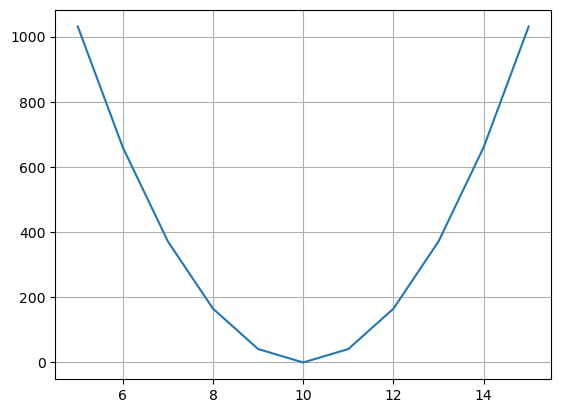

In [74]:
# 가중치 변화에 따르 비용함수의 변화를 그래프로 그려보자
cost_list = [cost(df["공부시간"],df["성적"], i) for i in range(5,16)]
plt.plot(range(5,16), cost_list)
plt.grid()
plt.show()

In [73]:
lm_model.score(df[['공부시간']], df['성적'])
# 분류모델 :score - 정확도
# 회귀모델 : score(MSE를 기반으로한 R2score) - 유사도
# R2score : 결정계수

1.0

## 경사하강법
- SGDRegressor
- 점진적으로 오차가 적은 선형함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그림
- 점진적으로 찾아가므로 계산량이 많아서 시간이 오래걸림
- 학습률(learning rate, eta0)
    - 너무 크게 설정하면 오차가 커짐(발산)
    - 너무 작게 설정하면 국소지역점에 바져서 최적해를 찾을 수 없음
- 오차가 유의미하게 변하지 않을 경우 early-stopping

In [92]:
from sklearn.linear_model import SGDRegressor as sgd
# 모델 생성 및 하이퍼 파라미터 설정
sgd_model = sgdr(max_iter= 5000, eta0=0.001, verbose=1 )
# max_iter 가중치 업데이트 반복 횟수
#eta0 : 학습률
sgd_model.fit(df[['공부시간']], df['성적'])

-- Epoch 1
Norm: 1.25, NNZs: 1, Bias: 0.176276, T: 4, Avg. loss: 1895.732819
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 1, Bias: 0.296893, T: 8, Avg. loss: 1471.382442
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.81, NNZs: 1, Bias: 0.393559, T: 12, Avg. loss: 1198.423406
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.39, NNZs: 1, Bias: 0.475042, T: 16, Avg. loss: 998.284808
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 1, Bias: 0.545347, T: 20, Avg. loss: 840.707727
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 1, Bias: 0.607236, T: 24, Avg. loss: 715.126801
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.74, NNZs: 1, Bias: 0.662112, T: 28, Avg. loss: 613.294159
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.09, NNZs: 1, Bias: 0.711272, T: 32, Avg. loss: 528.576413
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.41, NNZs: 1, Bias: 0.755749, T: 36, Avg. loss: 457.901087
Total training time: 0.00 

limit_output extension: Maximum message size of 10000 exceeded with 14897 characters

In [90]:
# early stopping을 통해 학습이 정지됨 -> LGBM 모델에 있는 속성
# Epoch 가중치가 업데이트 된 횟수 
# loss 비용 : 오차값

In [91]:
sgd_model.predict([[7]])
sgd_model.score(df[['공부시간']], df['성적'])
# 1에 가까울수록 모델이 예측한 성능이 높다.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


0.9995469433774614

In [97]:
##  입력 데이터를 완벽하게 설명하는 회귀식은 불가능 --> 오차가 가장 작은 선형함수를 찾는 다는 것은?
# 내가 가지고 있는 각각의 오차들의 평균제곱오차 MSE 가장 작은 선형함수를 찾는 행위
# 평균 제곱 오차가 가장 작은 선형 함수 : 최적(최선)의 선형함수

## 평균 제곱오차가 가장 작은 선형함수를 찾는 방법
1. 수학적 계산
    - 장점 : 적은 계산으로 구함 --> 한번에 최적의 선형함수를 찾음
    - 단점 : 공식이 완벽하지 않을 경우 잘못찾을 수 있음. 공식 수정이 불가능하다.
2. 경사하강법
    - 장점 : 잘못된 분석을 하였을 때 수정할 수 있다.
    - 단점: 점진적으로 찾아가므로 계산량이 많다.